<h1><center><u> Email - SMS Classifier</u> </center></h1>


## Problem  Statement : Need to Classify that the Email, SMS is SPAM or Not SPAM

## Step 1.a: Identify the Data 

#### For this project I am using two Different dataset from Kaggle one is Email Spam Dataset other is SMS spam Dataset

In [1]:
import opendatasets as od
import os

In [2]:
path_SMS =r"https://www.kaggle.com/datasets/assumewisely/sms-spam-collection"
path_email=r'https://www.kaggle.com/datasets/venky73/spam-mails-dataset'
od.download(path_email)
od.download(path_SMS)


Skipping, found downloaded files in ".\spam-mails-dataset" (use force=True to force download)
Skipping, found downloaded files in ".\sms-spam-collection" (use force=True to force download)


In [3]:
datadir_SMS ='sms-spam-collection'
datadir_email ='spam-mails-dataset'
print("Email-Spam File name :",os.listdir(datadir_email))
print("----------------------------------------------")
print("SMS-Spam File name :",os.listdir(datadir_SMS))

Email-Spam File name : ['spam_ham_dataset.csv']
----------------------------------------------
SMS-Spam File name : ['SMSSpamCollection.tsv']


## Step 1.b: Get the Data 

#### To get both data , notice that both files are in different format one in (.csv) and other in  (.tsv)

In [4]:
import pandas as pd

In [5]:
Email = pd.read_csv(r'spam-mails-dataset/spam_ham_dataset.csv')
Email.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
SMS = pd.read_csv(r'sms-spam-collection/SMSSpamCollection.tsv',sep = '\t')
SMS.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


## Step 2: Explore the Data

In [7]:
print(Email.text.head())
print(Email.text.tail())

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, dtype: object


### Analyse 0: 
#### Text in  E-Mail contain "Subject :" Need to remove this .


In [8]:
# Explore Number of Rows and Columns in E-Mail and SMS

print("\n --------------- E-Mail -----------------------")
print("No. Of Rows in E-Mail :",Email.shape[0])
print("No. Of Columns in E-Mail :",Email.shape[1])
print("\n --------------- SMS -----------------------")
print("No. Of Rows in SMS :",SMS.shape[0])
print("No. Of Columns in SMS :",SMS.shape[1],"\n")


 --------------- E-Mail -----------------------
No. Of Rows in E-Mail : 5171
No. Of Columns in E-Mail : 4

 --------------- SMS -----------------------
No. Of Rows in SMS : 5567
No. Of Columns in SMS : 2 



### Analyse 1: 
#### Number of rows in E-Mail is less than SMS and No. of columns in SMS is more than E-Mail


In [9]:
# Explore Features in E-Mail and SMS

print("\n ------------------------------------ E-Mail ------------------------------------------------------------------------\n")
print("Feature Name in E-Mail :",Email.columns,"\n")

print("\n ------------------------------------ SMS ---------------------------------------------------------------------------\n")
print("Feature Name in SMS :",SMS.columns,"\n")


 ------------------------------------ E-Mail ------------------------------------------------------------------------

Feature Name in E-Mail : Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object') 


 ------------------------------------ SMS ---------------------------------------------------------------------------

Feature Name in SMS : Index(['ham', 'I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.'], dtype='object') 



### Analyse 2: 
#### 1. In E-Mail only Label and text feature name import so drop other feature name.
#### 2. In SMS need to Rename feature name.
#### 3. Label_num alsi important in SMS but there are no such feature So after concat both we create new feature called label no.

In [10]:
# checking Null in E-mail and SMS

print("\n --------------- E-Mail -----------------------")
print(Email.isna().sum())
print("\n --------------- SMS -----------------------")
print(SMS.isna().sum(),"\n")


 --------------- E-Mail -----------------------
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

 --------------- SMS -----------------------
ham                                                                                                                                                                                                     0
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.    0
dtype: int64 



### Analyse 3: 
####  No Null Value in both(E-mail & SMS)

In [11]:
Email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [12]:
SMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                --------------  ----- 
 0   ham                                                                                                                                                                                                   5567 non-null   object
 1   I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.  5567 non-null

## Step 2 : EDA

#### Wrangling Data

In [13]:
# Dropping the feature Name ['Unnamed: 0','label_num'] in Email Dataset

drop_feature_name= ['Unnamed: 0','label_num']

Email = Email.drop(columns=drop_feature_name ,axis=1)
Email.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [14]:
# Text in  E-Mail contain "Subject :" Need to remove this .
Email['text'] = Email['text'].str[len('Subject:'):]
Email['text'].head()

0     enron methanol ; meter # : 988291\r\nthis is ...
1     hpl nom for january 9 , 2001\r\n( see attache...
2     neon retreat\r\nho ho ho , we ' re around to ...
3     photoshop , windows , office . cheap . main t...
4     re : indian springs\r\nthis deal is to book t...
Name: text, dtype: object

In [15]:
# Rename the feature Name  in SMS Dataset

rename_feature_name= {"ham" : "label", 
                      "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times." : "text"}

SMS = SMS.rename(columns=rename_feature_name)
SMS.head()

,label,text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [16]:
# Explore Number of Rows and Columns in E-Mail and SMS

print("\n --------------- E-Mail -----------------------")
print("No. Of Rows in E-Mail :",Email.shape[0])
print("No. Of Columns in E-Mail :",Email.shape[1])
print("\n --------------- SMS -----------------------")
print("No. Of Rows in SMS :",SMS.shape[0])
print("No. Of Columns in SMS :",SMS.shape[1],"\n")


 --------------- E-Mail -----------------------
No. Of Rows in E-Mail : 5171
No. Of Columns in E-Mail : 2

 --------------- SMS -----------------------
No. Of Rows in SMS : 5567
No. Of Columns in SMS : 2 



In [17]:
# Concate Both E-Mail and SMS Dataset
data = pd.concat([Email , SMS ],ignore_index=True)
data.head()

,label,text
0,ham,enron methanol ; meter # : 988291\r\nthis is ...
1,ham,"hpl nom for january 9 , 2001\r\n( see attache..."
2,ham,"neon retreat\r\nho ho ho , we ' re around to ..."
3,spam,"photoshop , windows , office . cheap . main t..."
4,ham,re : indian springs\r\nthis deal is to book t...


In [18]:
# data =Email.copy()

In [19]:
data.tail()

,label,text
10733,spam,This is the 2nd time we have tried 2 contact u...
10734,ham,Will ü b going to esplanade fr home?
10735,ham,"Pity, * was in mood for that. So...any other s..."
10736,ham,The guy did some bitching but I acted like i'd...
10737,ham,Rofl. Its true to its name


In [20]:
print("\n --------------- Final-Data -----------------------")
print("No. Of Rows in Data :",data.shape[0])
print("No. Of Columns in Data :",data.shape[1])



 --------------- Final-Data -----------------------
No. Of Rows in Data : 10738
No. Of Columns in Data : 2


In [21]:
# Rename label to target in data
# data = data.rename(columns={'label' :'target'})
data['target'] = data['label']
data.columns

Index(['label', 'text', 'target'], dtype='object')

In [22]:
# cheacking null
data.isna().sum()

label     0
text      0
target    0
dtype: int64

In [23]:
# No. of Ham and Spam in label

print("No. of Ham and Spam in label")
data.target.value_counts()

No. of Ham and Spam in label


ham     8493
spam    2245
Name: target, dtype: int64

In [24]:
# grouping label to check describtion

data.groupby(data.target).describe()

label                     text                                    
       count unique   top  freq count unique                     top freq
target                                                                   
ham     8493      1   ham  8493  8493   8043  Sorry, I'll call later   30
spam    2245      1  spam  2245  2245   2114                    \r\n   16

## Labelize the Feature Target Feature

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])


In [26]:
data.head()

,label,text,target
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0
3,spam,"photoshop , windows , office . cheap . main t...",1
4,ham,re : indian springs\r\nthis deal is to book t...,0


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

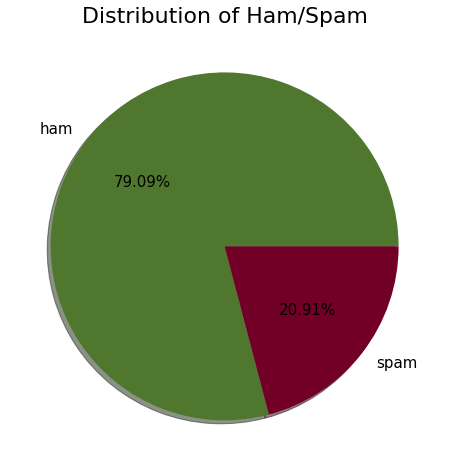

In [28]:
plt.figure(facecolor="white",figsize=(8,8))
plt.pie(data['target'].value_counts(), labels=['ham','spam'] ,colors=['#4f772d','#720026'], autopct='%0.2f%%',shadow=True,textprops={'fontsize': 15});
plt.title("Distribution of Ham/Spam",fontsize=22);


### Analyse 4: 
####  Is Seem data is not Balance % of Ham(79.09%)  more than % of spam(20.91%)

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
data['no_of_characters']=data['text'].apply(len)

In [32]:
data.head(2)

,label,text,target,no_of_characters
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89


In [33]:
data['no_of_words'] = data['text'].apply(lambda x :len( nltk.word_tokenize(x)))

In [34]:
data.head(2)

,label,text,target,no_of_characters,no_of_words
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319,66
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89,22


In [35]:
data['no_of_Sentence'] = data['text'].apply(lambda x :len( nltk.sent_tokenize(x)))

In [36]:
data.head(2)

,label,text,target,no_of_characters,no_of_words,no_of_Sentence
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319,66,3
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89,22,1


In [37]:
data.describe()

,target,no_of_characters,no_of_words,no_of_Sentence
count,10738.000000,10738.000000,10738.000000,10738.000000
mean,0.209071,542.729093,119.165301,5.839542
std,0.406664,1164.868204,255.844855,15.602072
min,0.000000,2.000000,0.000000,0.000000
25%,0.000000,55.000000,13.000000,1.000000
50%,0.000000,141.000000,30.000000,2.000000
75%,0.000000,503.000000,113.000000,6.000000
max,1.000000,32250.000000,8861.000000,1163.000000


In [38]:
# Ham
data[data['target']==0].describe()

,target,no_of_characters,no_of_words,no_of_Sentence
count,8493.0,8493.000000,8493.000000,8493.000000
mean,0.0,459.521488,106.838337,4.763217
std,0.0,1013.065079,241.480112,14.832249
min,0.0,2.000000,1.000000,1.000000
25%,0.0,46.000000,12.000000,1.000000
50%,0.0,104.000000,25.000000,2.000000
75%,0.0,414.000000,97.000000,5.000000
max,0.0,32250.000000,8861.000000,1163.000000


In [39]:
# Spam
data[data['target']==1].describe()

,target,no_of_characters,no_of_words,no_of_Sentence
count,2245.0,2245.000000,2245.000000,2245.000000
mean,1.0,857.509577,165.799109,9.911359
std,0.0,1575.863781,299.616254,17.641551
min,1.0,3.000000,0.000000,0.000000
25%,1.0,147.000000,28.000000,2.000000
50%,1.0,278.000000,53.000000,4.000000
75%,1.0,799.000000,163.000000,10.000000
max,1.0,22065.000000,3961.000000,331.000000


In [40]:
import seaborn as sns

In [41]:
data[data['target']==0]['no_of_characters']

0         319
1          89
2        2516
4         328
5         472
         ... 
10731      12
10734      36
10735      57
10736     125
10737      26
Name: no_of_characters, Length: 8493, dtype: int64

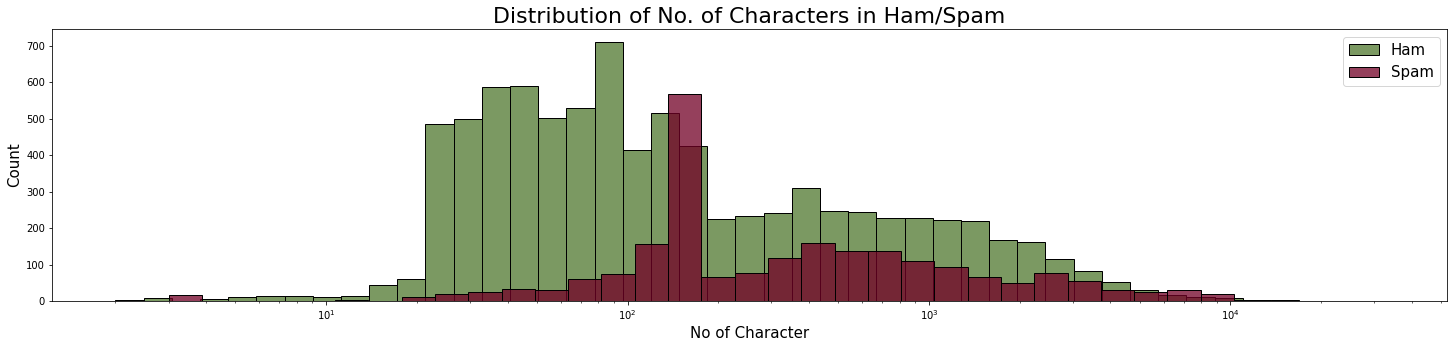

In [42]:
plt.figure(figsize=(25,5))
sns.histplot(data[data['target']==0]['no_of_characters'],color='#4f772d',log_scale=True)
sns.histplot(data[data['target']==1]['no_of_characters'],color='#720026',log_scale=True)
plt.title("Distribution of No. of Characters in Ham/Spam",fontsize=22)
plt.xlabel('No of Character',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Ham','Spam'],fontsize=15);

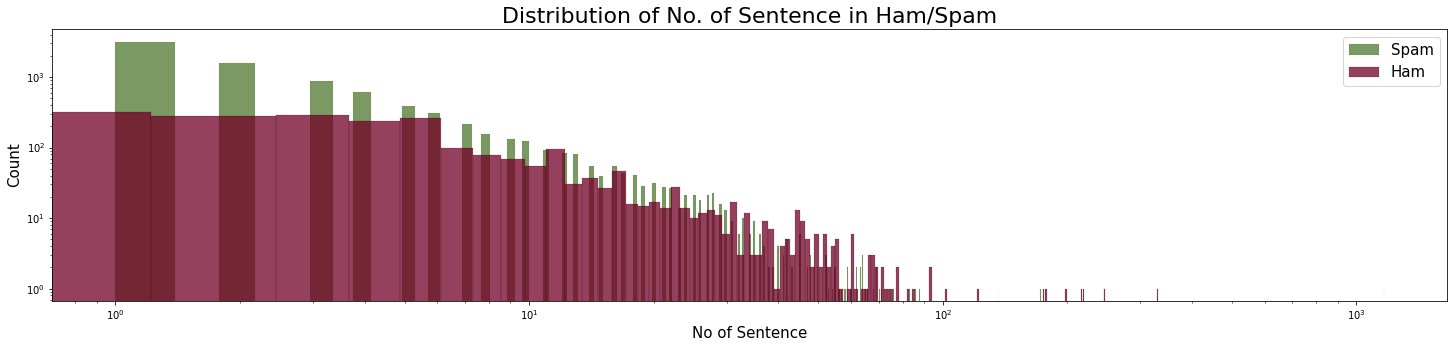

In [43]:
plt.figure(figsize=(25,5))
sns.histplot(data[data['label']=='ham']['no_of_Sentence'],color='#4f772d')
sns.histplot(data[data['label']=='spam']['no_of_Sentence'],color='#720026')

plt.title("Distribution of No. of Sentence in Ham/Spam",fontsize=22)
plt.xlabel('No of Sentence',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Spam','Ham'],fontsize=15)
plt.loglog(True)
plt.yscale('log');

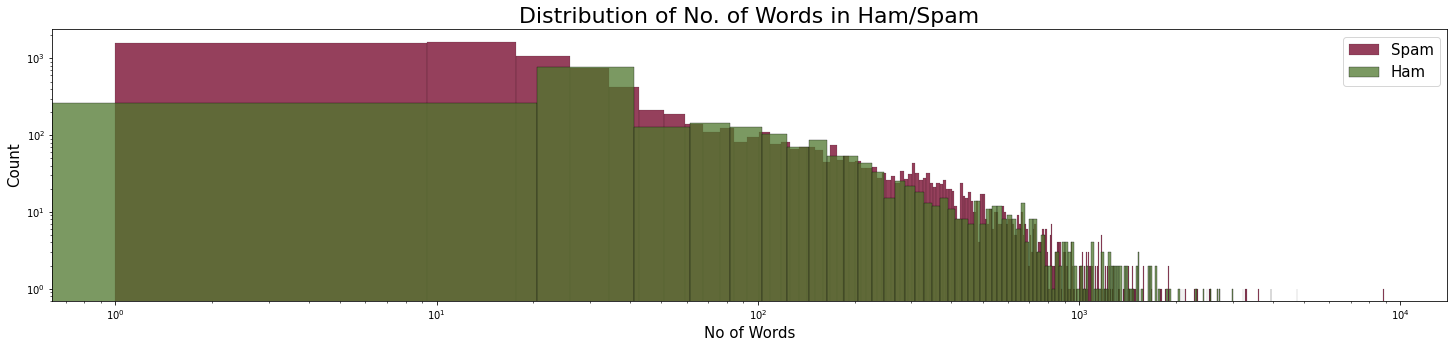

In [44]:

plt.figure(figsize=(25,5))
sns.histplot(data[data['label']=='ham']['no_of_words'],color='#720026')
sns.histplot(data[data['label']=='spam']['no_of_words'],color='#4f772d')


plt.title("Distribution of No. of Words in Ham/Spam",fontsize=22)
plt.xlabel('No of Words',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Spam','Ham'],fontsize=15)
plt.loglog(True)
plt.yscale('log');

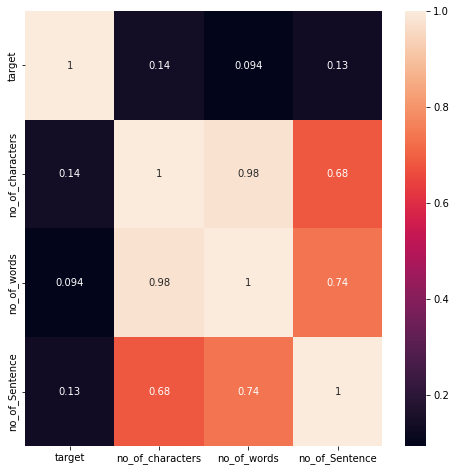

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True);
# sns.set(font_scale=1.4);

#### 3. Data Preprocessing
        Lower case
        Tokenization
        Removing special characters
        Removing stop words and punctuation
        Stemming

In [46]:
from  nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('breaking')

'break'

In [48]:
def transform_text(text):
    
    # 1. Lower case
    text = text.lower()
    
   # 2. Tokenization
    text = nltk.word_tokenize(text)
    
   # 3.Removing special characters
    List_stoage = []
    
    for word in text:

        if word.isalnum():
            List_stoage.append(word)
            
    # 4.Removing stop words 
    text = List_stoage.copy()
    List_stoage.clear()
    
    for word in text:
        if word not in stopwords.words('english'):
            List_stoage.append(word)  
    
    # 5.Stemming
    text = List_stoage.copy()
    List_stoage.clear()
    
    for word in text:
        List_stoage.append(ps.stem(word)) 
    
    # 6. return the string
    return " ".join(List_stoage)

In [49]:
transform_text("Hi how Are You breaking dancing girl @ 200 '! #$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' ")

'hi break danc girl 200'

In [50]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [51]:
data['text'][9:10]

9     nominations for oct . 21 - 23 , 2000\r\n( see...
Name: text, dtype: object

In [52]:
transform_text(str(data['text'][0:1]))

'0 enron methanol meter name text dtype object'

### Transform text with Function

In [53]:
data['transform_text'] = data['text'].apply(transform_text) 

In [54]:
data.tail(2)

,label,text,target,no_of_characters,no_of_words,no_of_Sentence,transform_text
10736,ham,The guy did some bitching but I acted like i'd...,0,125,27,1,guy bitch act like interest buy someth els nex...
10737,ham,Rofl. Its true to its name,0,26,7,2,rofl true name


In [55]:
from wordcloud import WordCloud
wc =WordCloud(width=600 ,height=500,min_font_size=10,background_color='white')

In [56]:
Ham_wc =wc.generate(data[data['target']==0]['transform_text'].str.cat(sep=' '));

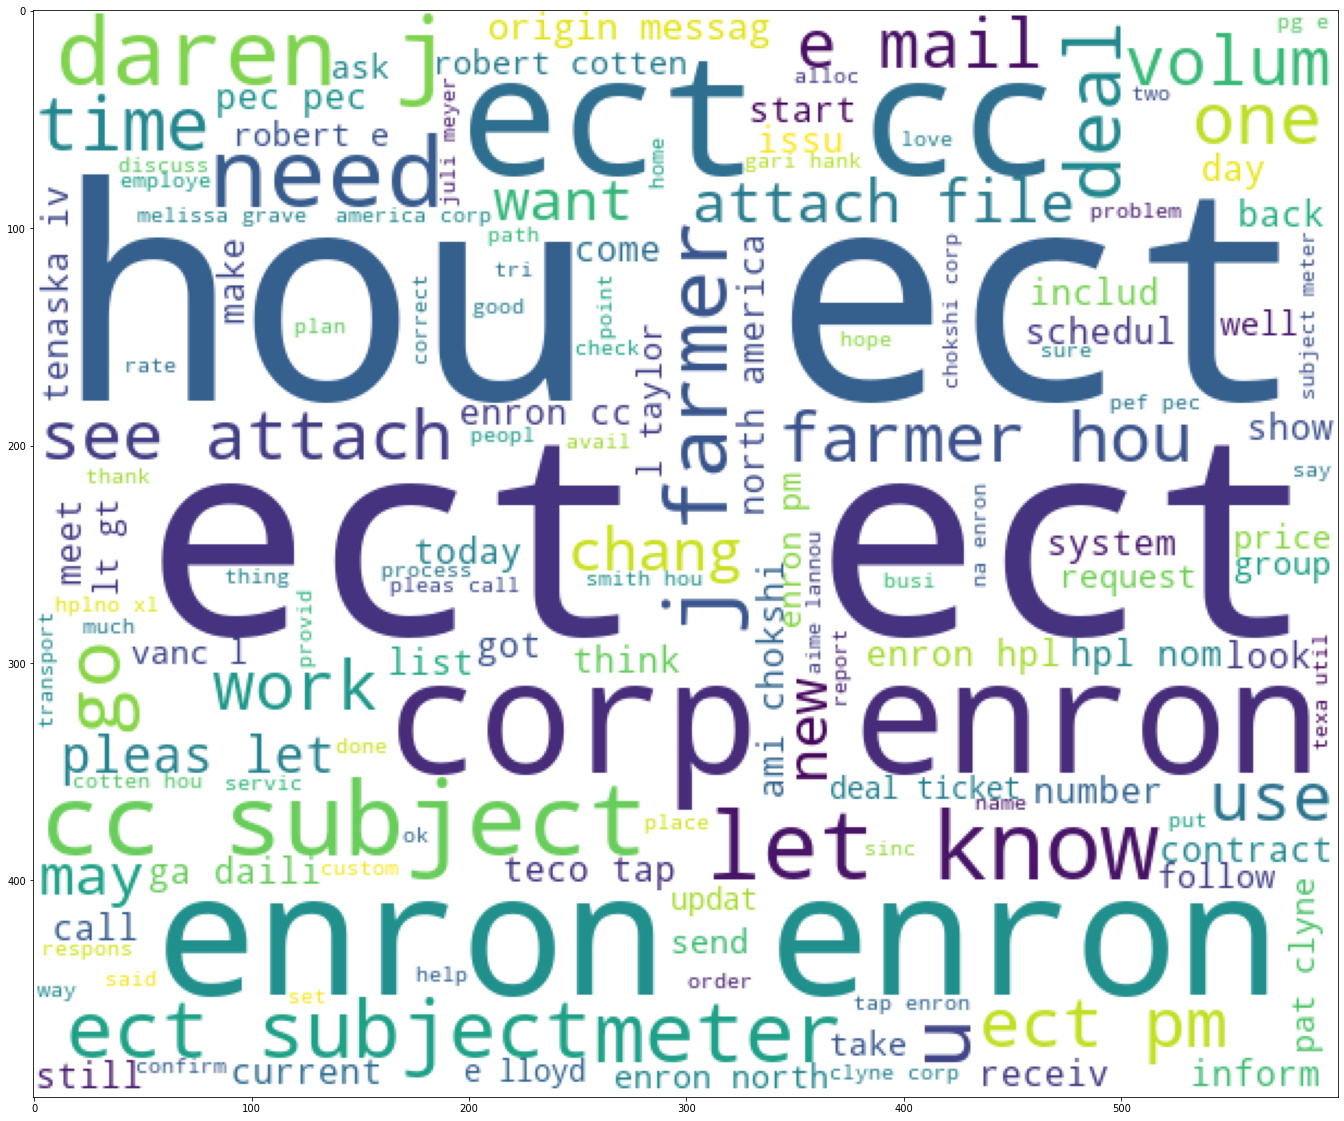

In [57]:
plt.figure(figsize=(50,20))
plt.imshow(Ham_wc);

In [58]:
Spam_wc =wc.generate(data[data['target']==1]['transform_text'].str.cat(sep=' '));

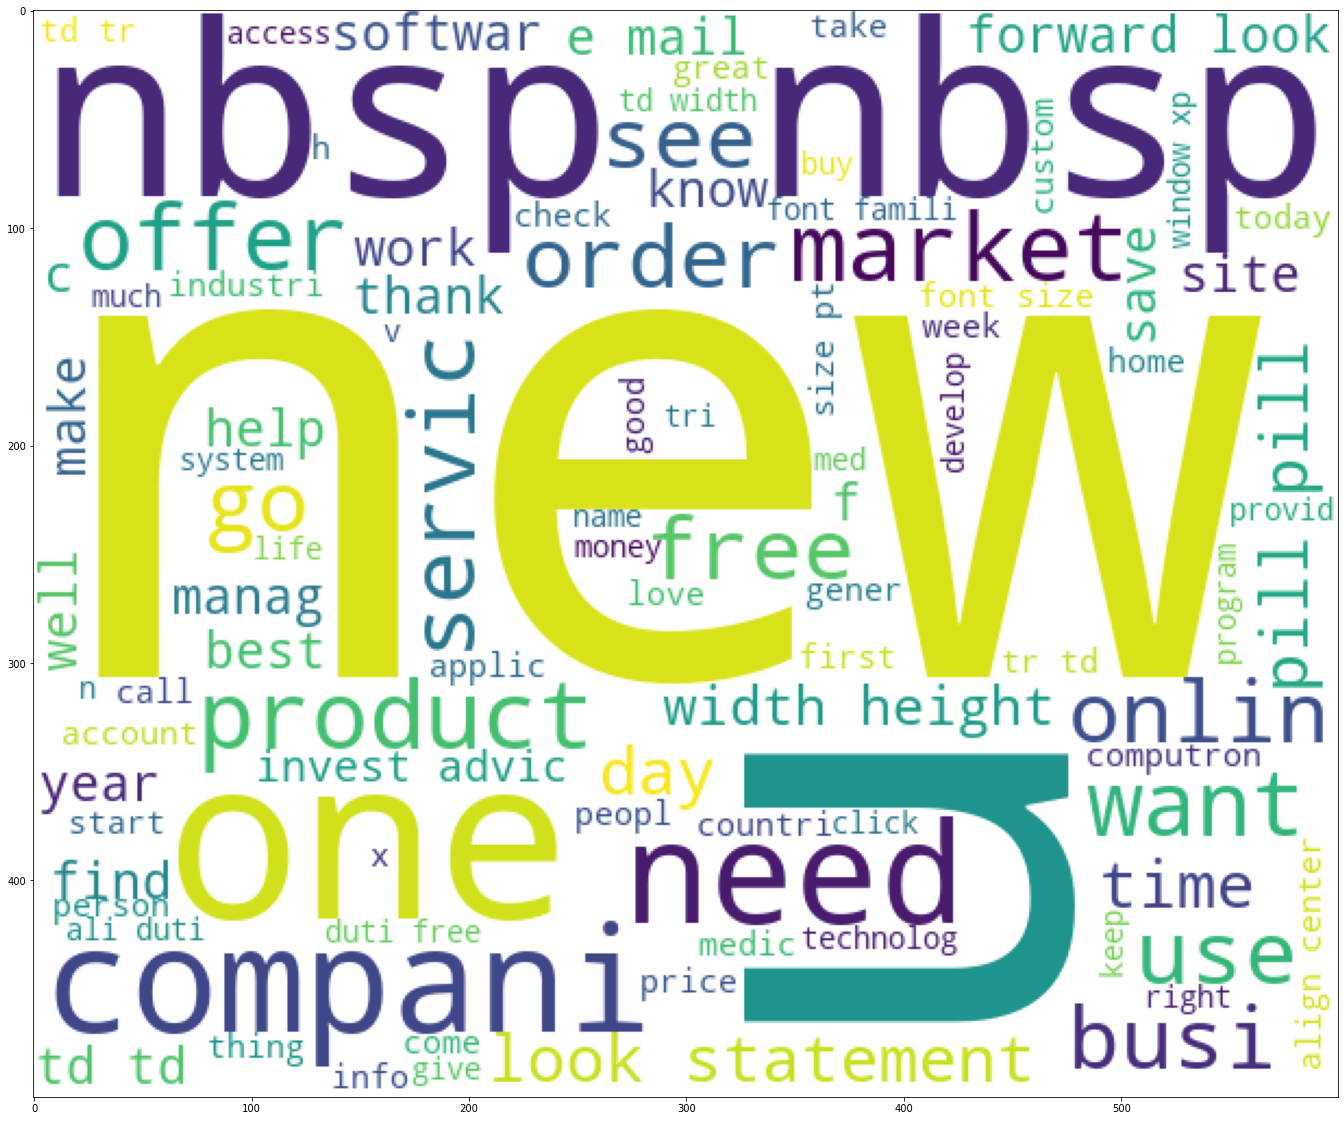

In [59]:
plt.figure(figsize=(50,20))
plt.imshow(Spam_wc);

In [60]:
ham_word = []
for text in data[data['label']=='ham']['transform_text'].tolist():
    for word in text.split():
        ham_word.append(word)


In [61]:
len(ham_word)

423734

In [62]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [63]:
ham_data = pd.DataFrame(Counter(ham_word).most_common(30),columns=['word','count'])
ham_data.head()

,word,count
0,ect,13897
1,hou,7281
2,enron,6555
3,2000,4309
4,deal,3560


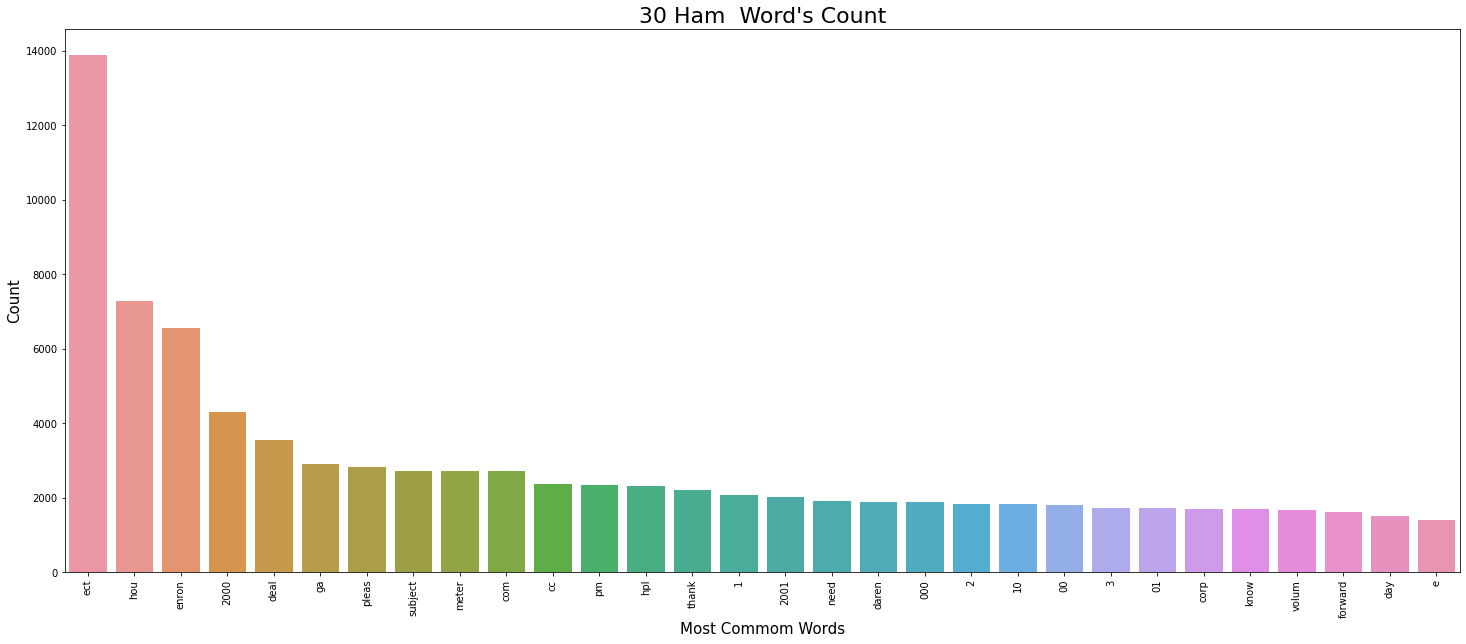

In [64]:

plt.figure(figsize=(25,10))
sns.barplot(x='word',y='count',data=ham_data)
plt.xticks(rotation='vertical')
plt.title("30 Ham  Word's Count",fontsize=22)
plt.xlabel('Most Commom Words',fontsize=15)
plt.ylabel('Count',fontsize=15);



In [65]:
spam_word = []
for text in data[data['label']=='spam']['transform_text'].tolist():
    for word in text.split():
        spam_word.append(word)

In [66]:
len(spam_word)

207480

In [67]:
spam_data = pd.DataFrame(Counter(spam_word).most_common(30),columns=['word','count'])
spam_data.head()

,word,count
0,3,1261
1,2,1032
2,http,1003
3,com,992
4,compani,921


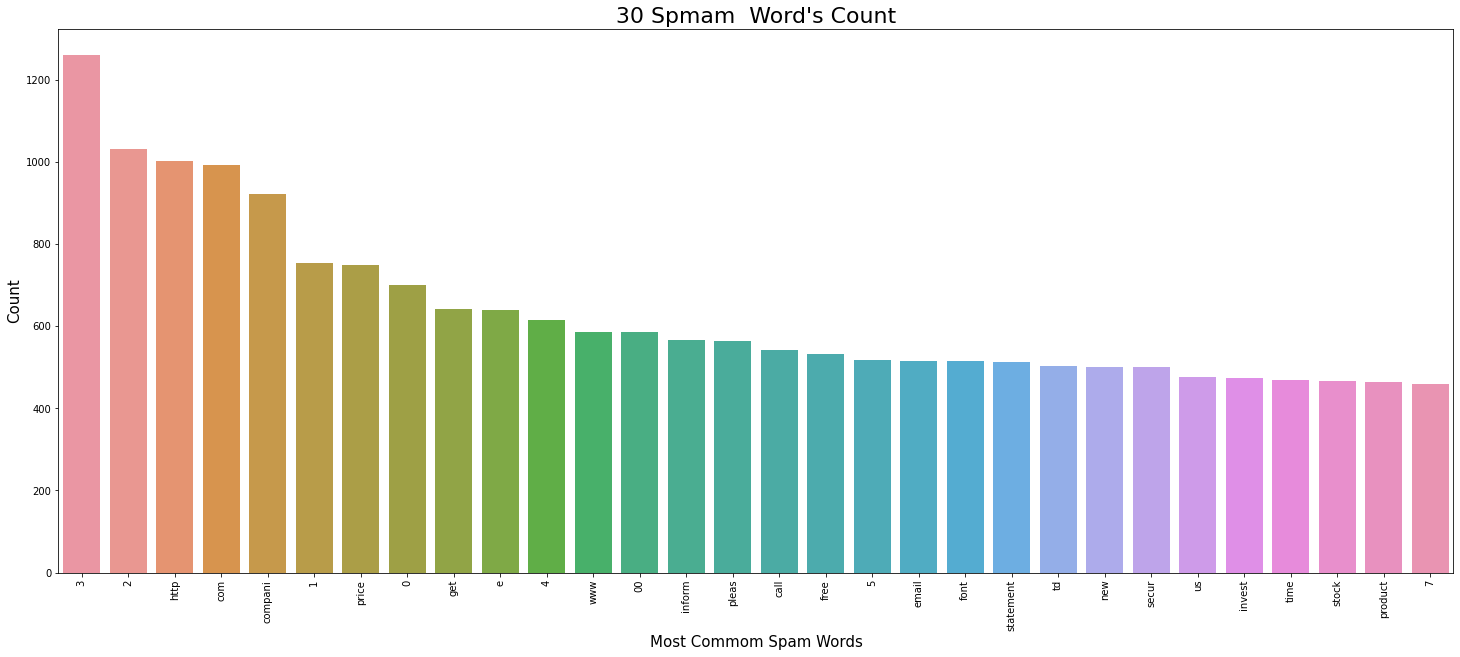

In [68]:
plt.figure(figsize=(25,10))
sns.barplot(x='word',y='count',data=spam_data)
plt.xticks(rotation='vertical')
plt.title("30 Spmam  Word's Count",fontsize=22)
plt.xlabel('Most Commom Spam Words',fontsize=15)
plt.ylabel('Count',fontsize=15);


In [69]:
data.head(2)

,label,text,target,no_of_characters,no_of_words,no_of_Sentence,transform_text
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319,66,3,enron methanol meter 988291 follow note gave m...
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89,22,1,hpl nom januari 9 2001 see attach file hplnol ...


# 4. Model Building

In [70]:
# Divide Independent Feature (X) --Vector_text ,dependent Feature (y) --target
X =data['transform_text']
y = data['target']

In [71]:
# split train ,test X and y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [77]:
# Vectoized our Text Feature

from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_train_count = count_vector.fit_transform(X_train.values).toarray()
X_test_count = count_vector.transform(X_test.values).toarray()

In [78]:
X_train_count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
X_test_count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
# Libaries for Model - Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

print('import Successfully')

import Successfully


# Hyper-Parameter Tuning

model_parameter ={
    
    "Logistic_Regression" :{
                            "model" : LogisticRegression(solver='liblinear'),
                            "param" : {}
                           },
    
    "Decision_Tree" :{
                            "model" : DecisionTreeClassifier(),
                            "param" : {}
                     },
    
    "SVC" : {
                            "model" : SVC(),
                            "param" : {}
           },
    
    "KNeighborsClassifier" : {
                            "model" : KNeighborsClassifier(),
                            "param" : {'n_neighbors' : [5,6]}
                            },
    
    "BernoulliNB" :  {
                        "model" : BernoulliNB(),
                        "param" : {}
                             },
    
    "MultinomialNB" : {
                        "model" : MultinomialNB(),
                         "param" : {}
                     },
    
     "GaussianNB" :{
                        "model" : GaussianNB(),
                        "param" : {}
                      },
    
    "RandomForestClassifier" :{
                        "model" : RandomForestClassifier(),
                        "param" : {}
                          },
    
    "BaggingClassifier" :{
                        "model" : BaggingClassifier(oob_score=True,max_samples = 0.8),
                        "param" : {}
                          },
    
     "AdaBoostClassifier" :{
                        "model" : AdaBoostClassifier(),
                        "param" : {}
                          },
    
    "GradientBoostingClassifier" :{
                        "model" : GradientBoostingClassifier(),
                        "param" : {}
                          },
    
    "XGBClassifier" :{
                        "model" : XGBClassifier(),
                        "param" : {'criterion':['gini','entropy']}
                          }
}

    # Model Section 
    from sklearn.model_selection import RandomizedSearchCV

    Score = []
    for model_name ,model_param in model_parameter.items():
        rs = RandomizedSearchCV(model_param['model'],model_param['param'],cv = 5,return_train_score=False,n_iter=10)
        rs.fit(X,y)
        Score.append({'Model': model_name,
                     'Best_Score' : rs.best_score_,
                     'Best_Parameter' : rs.best_params_})

    Model_Report = pd.DataFrame(scores,columns=['Model','Best_Score','Best_Parameter'])
    Model_Report

    

    model_clf = {
        'SVC' : SVC(kernel='sigmoid', gamma=1.0),
        'KNC' : KNeighborsClassifier(), 
        'MNB': MultinomialNB(), 
        'BNB': BernoulliNB(), 
        'GNB': GaussianNB(), 
        'DT': DecisionTreeClassifier(max_depth=5), 
        'LR': LogisticRegression(solver='liblinear', penalty='l1'), 
        'RF': RandomForestClassifier(n_estimators=50, random_state=2), 
        'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=2), 
        'BgC': BaggingClassifier(n_estimators=50, random_state=2), 
        'GBDT':GradientBoostingClassifier(n_estimators=50,random_state=2),
        'xgb': XGBClassifier(n_estimators=50,random_state=2)
    }

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    return score

Score =[]
for model_name,clf in model_clf.items():
    
    score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    Score.append({'Model': model_name,
                 'Score' : score
                 })
    
Model_Report = pd.DataFrame(Score,columns=['Model','Score'])
Model_Report
    

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [85]:
model_clf = {
        'MNB': MultinomialNB(), 
        'BNB': BernoulliNB() }

In [88]:
def train_classifier(clf,X_train_count,X_test_count,y_train,y_test):
    
    clf.fit(X_train_count,y_train)
    score = clf.score(X_test_count,y_test)
    
    y_pred =clf.predict(X_test_count)
    precision = precision_score(y_pred,y_test)
    return score,precision

In [89]:
report =[] 


for model_name,clf in model_clf.items():

    score,precision = train_classifier(clf, X_train_count,X_test_count,y_train,y_test)

    report.append({'Model': model_name,
                 'Score' : score,
                 'Precision':precision
                 })
Model_Report = pd.DataFrame(report,columns=['Model','Score','Precision']) 
Model_Report

,Model,Score,Precision
0,MNB,0.942737,0.943946
1,BNB,0.862197,0.396861


# Sklearn Pipeline

In [90]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('mnb', MultinomialNB())
])


In [91]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [92]:
pipe.score(X_test,y_test)

0.9427374301675978

In [93]:
import joblib 
joblib.dump(pipe,"spam_sms_model.mnb")

['spam_sms_model.mnb']

In [94]:
predict=joblib.load('spam_sms_model.mnb')
predict

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [95]:
email =["""
            I HAVE A DATE ON SUNDAY WITH WILL!!
            
        """]

In [96]:
output = predict.predict(email)
if output == 0:
    print('Not Spam')
else:
    print('Spam')

Not Spam
